# Numba

By Alberto Valdés 

**Mail 1:** anvaldes@uc.cl 

**Mail 2:** alberto.valdes.gonzalez.96@gmail.com

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import image as mpimg

In [3]:
def display_img(name, a, b):
    plt.figure(figsize = (a, b))
    image = mpimg.imread(name)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

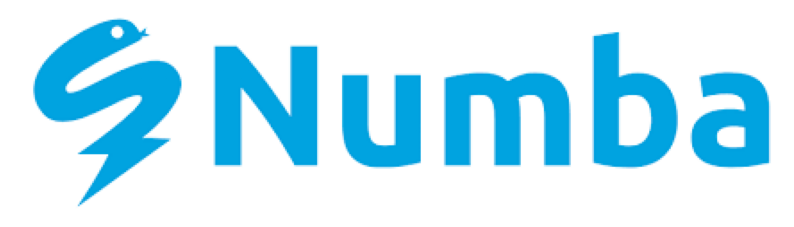

In [4]:
display_img('Numba.png', 10, 10)

Numba, created by the folks behind the Anaconda Python distribution, takes a different approach from most Python math-and-stats libraries. Typically, such libraries — like NumPy, for scientific computing — wrap high-speed math modules written in C, C++, or Fortran in a convenient Python wrapper. Numba transforms your Python code into high-speed machine language, by way of a just-in-time compiler or JIT.

In [5]:
import time

In [6]:
start = time.time()

# 1. JIT decorator

In [7]:
import numba
import random
import pandas as pd

In [8]:
N = 100_000_000

### i. Regular code

In [9]:
def monte_carlo_pi(nsamples):

    acc = 0

    for i in range(nsamples):

        x = random.random()
        y = random.random()

        if (x ** 2 + y ** 2) < 1.0:
            acc += 1

    return 4.0 * (acc / nsamples)

In [10]:
%%time

print(monte_carlo_pi(N))

3.14188848
CPU times: user 23 s, sys: 84 ms, total: 23 s
Wall time: 23.1 s


### ii. Numba code

This version wraps the monte_carlo_pi() function in Numba’s jit decorator, which in turn transforms the function into machine code (or as close to machine code as Numba can get given the limitations of our code). The results run over an order of magnitude faster.

In [11]:
@numba.jit()
def monte_carlo_pi(nsamples):

    acc = 0

    for i in range(nsamples):

        x = random.random()
        y = random.random()

        if (x ** 2 + y ** 2) < 1.0:
            acc += 1
            
    return 4.0 * acc / nsamples

In [12]:
%%time

print(monte_carlo_pi(N))

3.14166968
CPU times: user 1.54 s, sys: 1.13 s, total: 2.67 s
Wall time: 1.02 s


**Comments:** 20x faster.

# 2. Parallel

In [13]:
@numba.jit(parallel = True)
def monte_carlo_pi(nsamples):

    acc = 0

    for i in range(nsamples):

        x = random.random()
        y = random.random()

        if (x ** 2 + y ** 2) < 1.0:
            acc += 1
            
    return 4.0 * acc / nsamples

In [14]:
%%time

print(monte_carlo_pi(N))

3.1417324
CPU times: user 726 ms, sys: 4.91 ms, total: 731 ms
Wall time: 730 ms


**Comments:** 30x faster.

### Time of execution

In [15]:
end = time.time()

In [16]:
delta = (end - start)

hours = int(delta/3600)
mins = int((delta - hours*3600)/60)
segs = int(delta - hours*3600 - mins*60)
print(f'Execute this notebook take us {hours} hours, {mins} minutes and {segs} seconds.')

Execute this notebook take us 0 hours, 0 minutes and 25 seconds.
